training과 test가 나뉘어져 있다.


In [3]:
import os
import cv2
import torch
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
train_df = pd.read_csv("/NasData/home/lsh/10.project/data/butterfly/Training_set.csv")
test_df = pd.read_csv("/NasData/home/lsh/10.project/data/butterfly/Testing_set.csv")

print(train_df.info)
print(test_df.info)

    # train_len = 6499
    # test_len = 2786
    # test는 non label
    # label은 숫자로 바꿔준다.

<bound method DataFrame.info of             filename                     label
0        Image_1.jpg          SOUTHERN DOGFACE
1        Image_2.jpg                    ADONIS
2        Image_3.jpg            BROWN SIPROETA
3        Image_4.jpg                   MONARCH
4        Image_5.jpg  GREEN CELLED CATTLEHEART
...              ...                       ...
6494  Image_6495.jpg          MANGROVE SKIPPER
6495  Image_6496.jpg            MOURNING CLOAK
6496  Image_6497.jpg                   APPOLLO
6497  Image_6498.jpg           ELBOWED PIERROT
6498  Image_6499.jpg                     ATALA

[6499 rows x 2 columns]>
<bound method DataFrame.info of             filename
0        Image_1.jpg
1        Image_2.jpg
2        Image_3.jpg
3        Image_4.jpg
4        Image_5.jpg
...              ...
2781  Image_2782.jpg
2782  Image_2783.jpg
2783  Image_2784.jpg
2784  Image_2785.jpg
2785  Image_2786.jpg

[2786 rows x 1 columns]>


In [4]:
# 데이터 길이와 image 경로 설정
train_data_path = '/NasData/home/lsh/10.project/data/butterfly/train'
train_img_filename = train_df['filename']
test_data_path = '/NasData/home/lsh/10.project/data/butterfly/test'
test_img_filename = test_df['filename']

train_img = os.path.join(train_data_path, train_img_filename[0])
train_len = len(train_img_filename)
test_len = len(test_df)
print(f'train length : {train_len}')
print(f'test length : {test_len}')


train length : 6499
test length : 2786


In [5]:
# PATH와 File name 제대로 연결되어있는지 확인
test_list = []
for i in range(4):
    test_list.append(train_data_path+ '/'+ test_img_filename[i])
print(test_list)

['/NasData/home/lsh/10.project/data/butterfly/train/Image_1.jpg', '/NasData/home/lsh/10.project/data/butterfly/train/Image_2.jpg', '/NasData/home/lsh/10.project/data/butterfly/train/Image_3.jpg', '/NasData/home/lsh/10.project/data/butterfly/train/Image_4.jpg']


In [15]:
def plot_image_sample(dataset_paths, image_paths):
    image_df = pd.read_csv(image_paths)
    train_img_filename = image_df['filename']
    image = os.path.join(dataset_paths,'train', train_img_filename[3])
    print(image)
    img_sample = cv2.imread(image)
    plt.imshow(cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB))
    plt.show()


/NasData/home/lsh/10.project/data/butterfly/train/Image_4.jpg


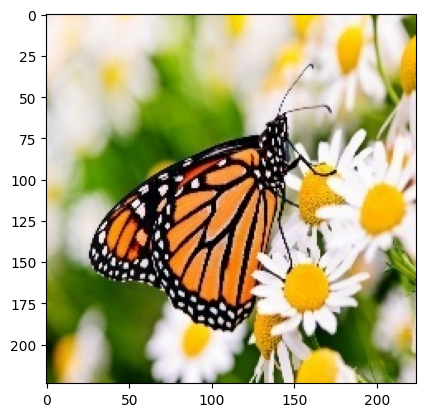

In [16]:
plot_image_sample('/NasData/home/lsh/10.project/data/butterfly/','/NasData/home/lsh/10.project/data/butterfly/Training_set.csv')

['/NasData/home/lsh/10.project/data/butterfly/train/Image_1.jpg', '/NasData/home/lsh/10.project/data/butterfly/train/Image_2.jpg', '/NasData/home/lsh/10.project/data/butterfly/train/Image_3.jpg', '/NasData/home/lsh/10.project/data/butterfly/train/Image_4.jpg']
/NasData/home/lsh/10.project/data/butterfly/train/Image_1.jpg
/NasData/home/lsh/10.project/data/butterfly/train/Image_2.jpg
/NasData/home/lsh/10.project/data/butterfly/train/Image_3.jpg
/NasData/home/lsh/10.project/data/butterfly/train/Image_4.jpg


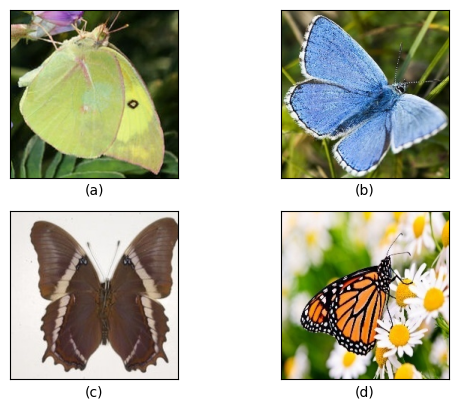

In [6]:
test_list = []
for i in range(4):
    test_list.append(train_data_path+ '/'+ test_img_filename[i])
print(test_list)

fig = plt.figure()
rows = 2
cols = 2
a = 1

xlabels = ["xlabels", "(a)", "(b)", "(c)", "(d)"]


sample_show = 4
# for i in range(sample_show):
for i in test_list:
    img_path = os.path.join(i)    # data_df.iloc[idx, 0]
    print(img_path)
    img_sample = cv2.imread(img_path)
    ax = fig.add_subplot(rows, cols, a)
    ax.imshow(cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB))
    ax.set_xlabel(xlabels[a])
    a += 1
    ax.set_xticks([]), ax.set_yticks([])
plt.show()    

In [7]:
# label check
train_label = train_df['label']
label_set = set(train_label)

# label dictionary 형태로 변환
dic_label = {}
for idx, label in enumerate(label_set):
    dic_label[idx] = label
print(dic_label)

# label 숫자로 반환
for idx in range(len(train_label)):
    for k, v in dic_label.items():
        if v == train_label[idx]:
            true_label = k
print(true_label)    



{0: 'APPOLLO', 1: 'CLOUDED SULPHUR', 2: 'SOUTHERN DOGFACE', 3: 'SOOTYWING', 4: 'BROWN SIPROETA', 5: 'AFRICAN GIANT SWALLOWTAIL', 6: 'BANDED ORANGE HELICONIAN', 7: 'PIPEVINE SWALLOW', 8: 'EASTERN PINE ELFIN', 9: 'ULYSES', 10: 'YELLOW SWALLOW TAIL', 11: 'CLODIUS PARNASSIAN', 12: 'TWO BARRED FLASHER', 13: 'MANGROVE SKIPPER', 14: 'ELBOWED PIERROT', 15: 'BECKERS WHITE', 16: 'CHECQUERED SKIPPER', 17: 'ZEBRA LONG WING', 18: 'ORANGE TIP', 19: 'PURPLISH COPPER', 20: 'JULIA', 21: 'EASTERN DAPPLE WHITE', 22: 'COPPER TAIL', 23: 'RED ADMIRAL', 24: 'STRAITED QUEEN', 25: 'QUESTION MARK', 26: 'PINE WHITE', 27: 'BLUE SPOTTED CROW', 28: 'VICEROY', 29: 'LARGE MARBLE', 30: 'SILVER SPOT SKIPPER', 31: 'AMERICAN SNOOT', 32: 'COMMON BANDED AWL', 33: 'EASTERN COMA', 34: 'CLEOPATRA', 35: 'DANAID EGGFLY', 36: 'SLEEPY ORANGE', 37: 'WOOD SATYR', 38: 'BANDED PEACOCK', 39: 'MALACHITE', 40: 'ORANGE OAKLEAF', 41: 'POPINJAY', 42: 'CRIMSON PATCH', 43: 'BLUE MORPHO', 44: 'ATALA', 45: 'COMMON WOOD-NYMPH', 46: 'IPHICLUS SI

44


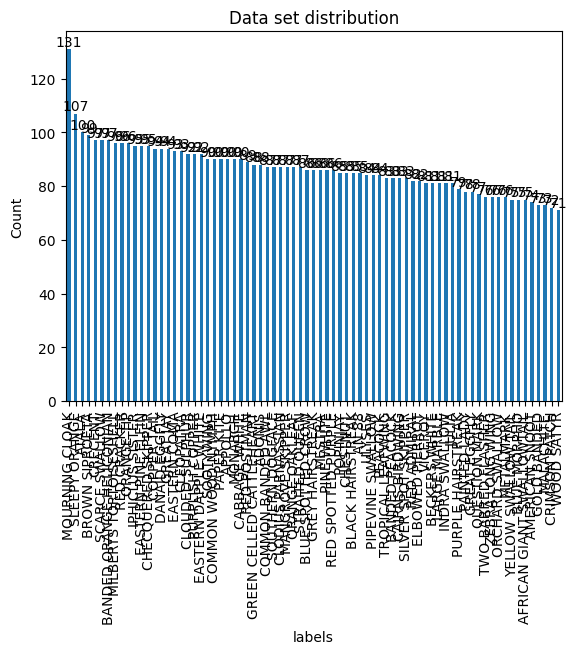

In [8]:
# plot the data distribution

train_label.value_counts().plot(kind='bar')

plt.title('Data set distribution')
plt.xlabel('labels')
plt.ylabel('Count')

for i in range(len(train_label.value_counts())):
    plt.text(i, train_label.value_counts()[i], train_label.value_counts()[i], ha='center', va='bottom')
    
plt.show()

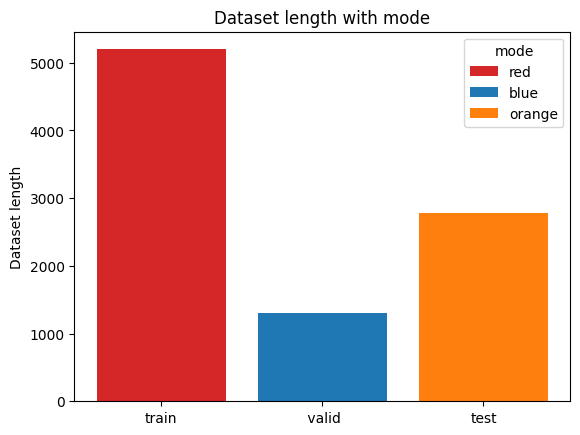

In [12]:
from sklearn.model_selection import train_test_split

data_train, data_valid = train_test_split(train_df, test_size=0.2, random_state= 5657)
data_test = test_df
fig, ax = plt.subplots()
dataset = ['train', ' valid', 'test']
counts = [data_train['filename'].count(), data_valid['filename'].count(), data_test['filename'].count()]
bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
ax.bar(dataset, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('Dataset length')
ax.set_title('Dataset length with mode')
ax.legend(title='mode')
plt.show()

# test dataset에 label 없기에 ['label']로는 작동하지 않는다.